# Drawing Quantum Gates with Qiskit


In [1]:
from qiskit import *
import numpy as np
from numpy import linalg as la
from qiskit.tools.monitor import job_monitor
import qiskit.tools.jupyter

# You need to clone this from the git repository
from qiskit_textbook.tools import array_to_latex
from qiskit.visualization import plot_histogram

In [2]:
qc = QuantumCircuit(2,2)

In [3]:
qc.h(0)
qc.draw()

┌───┐
q_0: ┤ H ├
     └───┘
q_1: ─────
          
c: 2/═════

In [4]:
usim = Aer.get_backend('unitary_simulator')
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()


array_to_latex(unitary, pretext="\\text{Circuit = }\n")


<IPython.core.display.Math object>

In [5]:
qc.cx(0,1)
qc.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘
c: 2/══════════

In [6]:
usim = Aer.get_backend('unitary_simulator')
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()


array_to_latex(unitary, pretext="\\text{Circuit = }\n")


<IPython.core.display.Math object>

In [7]:
svsim = Aer.get_backend('statevector_simulator')
final_state = svsim.run(qobj).result().get_statevector()
# Print the statevector neatly:
array_to_latex(final_state, pretext="\\text{Statevector = }")


<IPython.core.display.Math object>

In [8]:
qc.measure(0, 0)
qc.measure(1, 1)

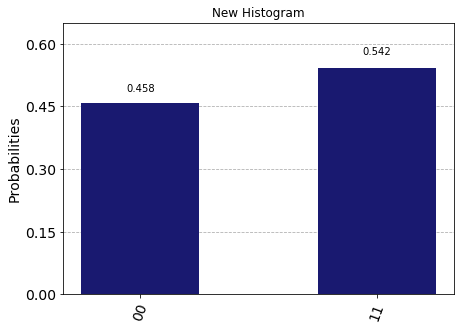

In [17]:
backend = BasicAer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024)
plot_histogram(job.result().get_counts(), color='midnightblue', title="New Histogram")